# DTEK0042 Exercise 2
    Group Members:
    1. Ayesha Zafar
    2. Mishqat Maqbool
    3. Rimsha Koakab

*** Note for Google Colab Users ***
     Because Google Colab doesn't have a button to convert your notebook to .html format here is a quick work around:
   1. open a new google colab notebook
   2. in the files section in google colab, upload the .ipynb file you want to be converted to .html
   3. in your new open notebook run this command in an empty cell: !jupyter nbconvert --to html YourFileName.ipynb
   4. after the command is finished running refresh the page
   5. In your files section you should see your original .ipynb file that you uploaded and then a .html file of that same notebook.
   6. download the .html file and you're good to go!

In this exercise, you are required to analyze an ECG signal step-by-step as outlined below. The deliverables for this exercise are a jupyter notebook in both .ipynb and .html format. Please provide caption for every figure and include description for every figure. 

## library Imports

In [5]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

# Data Import and plotting
* Import the ECG signal named “ECG_800Hz.txt” into your python environment and store it in a variable named “ECG_sig”. 
* Plot the signal
* Note: the sampling frequency of this signal is 800Hz. 
* You need this value if you want to plot ECG versus time.


     HINT: ECG_sig = np.loadtxt(the directory of the ECG signal) 
     https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html

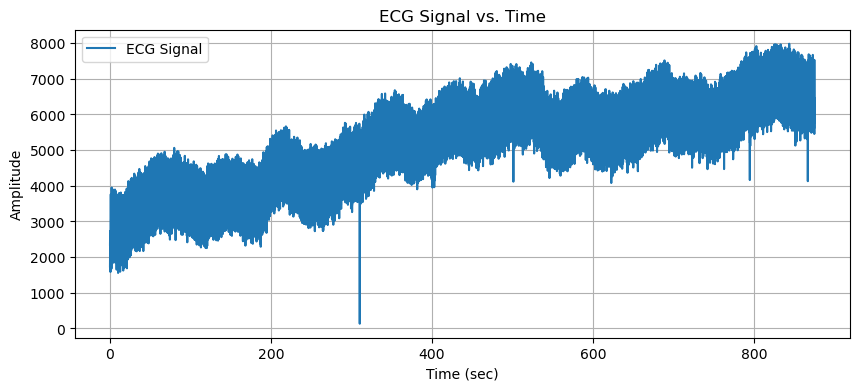

In [7]:
#code

# Loading ECG signal from file
ECG_sig = np.loadtxt('ECG_800Hz.txt')

# Defining the sampling frequency in Hz
fs = 800

# Generating the time values based on the length of the ECG signal in secs
t = np.arange(len(ECG_sig)) / fs 

# Ploting the ECG signal
plt.figure(figsize=(10, 4))
plt.plot(t, ECG_sig, label='ECG Signal')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('ECG Signal vs. Time')
plt.grid(True)
plt.legend()
plt.show()


# Discrete Fourier Transform

 * Compute DFT using FFT algorithm provided by scipy package. Take only the positive frequencies from the computed DFT and subsequently calculate the magnitude (absolute value) of frequency content. Plot the calculated magnitude versus frequency.
 * Discard the frequencies below 0.5Hz and above 40Hz and replot the magnitude versus frequency.
 

     * HINT use scipy.fft.rfft() outputs positive portion of function 
     
     https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfft.html
     https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfftfreq.html
     

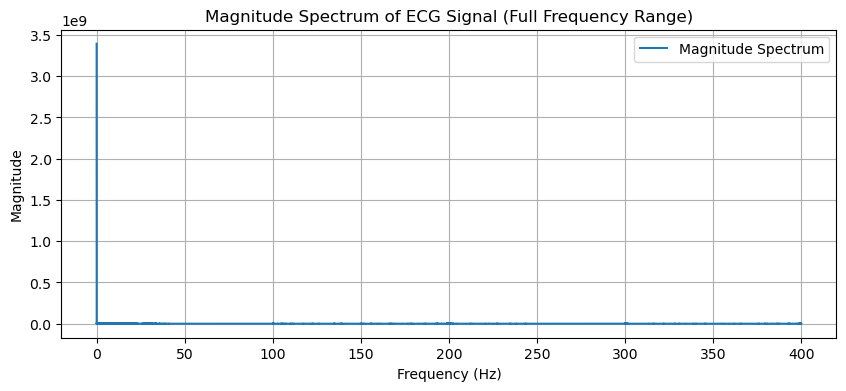

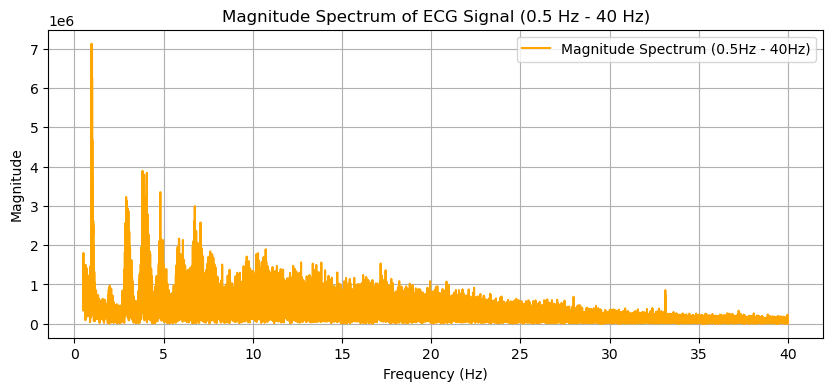

In [9]:
# code

# Import for DFT and FFT 
from scipy.fft import rfft, rfftfreq

# Computing DFT using rfft (only the +ve frequencies)
dft_ecg = rfft(ECG_sig)

# Computing the corresponding frequencies
frequencies = rfftfreq(len(ECG_sig), 1/fs)

# Calculating magnitude 
magnitude = np.abs(dft_ecg)

# Ploting magnitude vs frequency
plt.figure(figsize=(10, 4))
plt.plot(frequencies, magnitude, label='Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of ECG Signal (Full Frequency Range)')
plt.grid(True)
plt.legend()
plt.show()

# Creating a mask to filter frequencies between 0.5 Hz and 40 Hz
filter_mask = (frequencies >= 0.5) & (frequencies <= 40)

# Ploting magnitude vs frequency (filtered)
plt.figure(figsize=(10, 4))
plt.plot(frequencies[filter_mask], magnitude[filter_mask], label='Magnitude Spectrum (0.5Hz - 40Hz)', color='orange')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of ECG Signal (0.5 Hz - 40 Hz)')
plt.grid(True)
plt.legend()
plt.show()


# Band Pass Filter Design
*  Design a band pass filter. Use Butterworth filter of order 4 with cutoff frequencies equal to 0.5Hz and 40Hz.


* Design another butterworth band pass filter but this time use an order of 2 with cutoff frequencies equal to 0.5Hz and 40Hz


* Plot the frequency response of both filters and explain your observations


    * Hint use the following three functions scipy.signal.butter() and scipy.signal.freqz()


* Important to use the scipy.signal.freqz() function and NOT the scipy.signal.freqs() function. 

        scipy.signal.freqz() is for digital filters which is what we want.

https://docs.scipy.org/doc/scipy/reference/signal.html#filtering link to info about scipy.signal functions

C:\Users\Ayesha\AppData\Local\Temp\ipykernel_19360\3620605946.py:21: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w_4, 20 * np.log10(abs(h_4)), label=f'4th Order Butterworth Band-pass')
C:\Users\Ayesha\AppData\Local\Temp\ipykernel_19360\3620605946.py:30: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w_2, 20 * np.log10(abs(h_2)), label=f'2nd Order Butterworth Band-pass', color='orange')


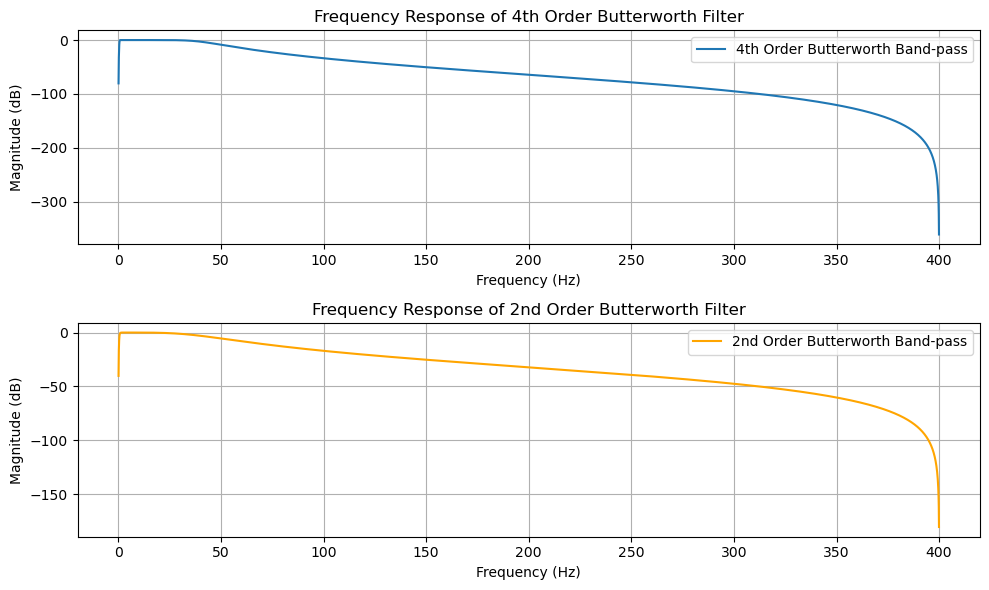

In [11]:
# code

# Impots for using butterworth filter
from scipy.signal import butter, freqz

# Designing a 4th-order butterworth band-pass filter
b_4, a_4 = butter(4, [0.5 / (fs / 2), 40.0 / (fs / 2)], btype='band')

# Designing a 2nd-order butterworth band-pass filter
b_2, a_2 = butter(2, [0.5 / (fs / 2), 40.0 / (fs / 2)], btype='band')

# Computing frequency response for both filters
w_4, h_4 = freqz(b_4, a_4, worN=8000, fs=fs)
w_2, h_2 = freqz(b_2, a_2, worN=8000, fs=fs)

# Ploting frequency response of both filters
plt.figure(figsize=(10, 6))

# 4th-order
plt.subplot(2, 1, 1)
plt.plot(w_4, 20 * np.log10(abs(h_4)), label=f'4th Order Butterworth Band-pass')
plt.title('Frequency Response of 4th Order Butterworth Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.legend()

# 2nd-order
plt.subplot(2, 1, 2)
plt.plot(w_2, 20 * np.log10(abs(h_2)), label=f'2nd Order Butterworth Band-pass', color='orange')
plt.title('Frequency Response of 2nd Order Butterworth Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


## Observations:

- The 4th-order filter has a sharper cutoff, doing a better job at excluding frequencies outside the required range. On the other hand, the 2nd-order filter has a gentler slope, allowing some frequencies outside the main range to leak in gradually.

- Both filters are set up to pass a specific range, but the 4th-order filter blocks unwanted frequencies more effectively. It quickly reduces signal levels in the 'stopband', focusing on just the range we need, while the 2nd-order filter allows a bit more leakage in those regions.

- Within the desired frequency range, both filters have a smooth response without noticeable 'ripples', which are designed for clean, even performance. However, the 4th-order filter gives stronger suppression outside this range, helping it avoid interference from other frequencies more reliably.

- 4th-order filter is ideal if precision and strong isolation are main concern but it’s more demanding to process and might add slight phase shifts. The 2nd-order filter is simpler, requiring less processing, and works well if strict frequency isolation isn’t critical. In short, 4th-order filter is better if accuracy matters most, and 2nd-order is ideal if more straightforward and lower-cost solution is needed.

# Apply filter to ECG_Sig
* Use the designed 4th order filter to filter ECG_sig and plot the first 5000 samples from the original signal (raw_signal) and the filtered signal.
* What happens after filtering?
* Explain your observations

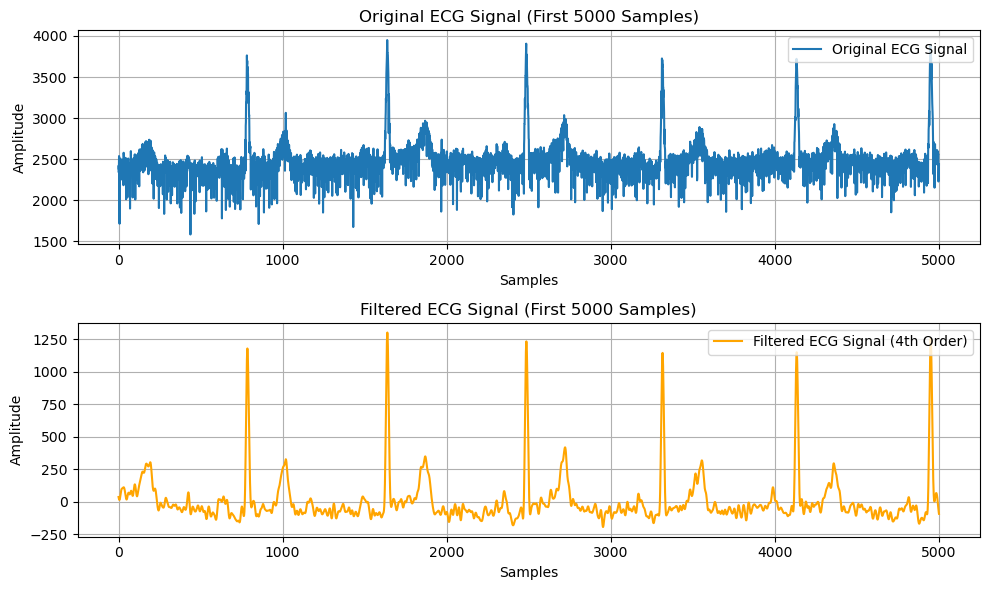

In [14]:
#code

# Imports
from scipy.signal import filtfilt

# Applying filter using filtfilt of scipy.signal
filtered_ecg = filtfilt(b_4, a_4, ECG_sig)

# Ploting first 5000 samples of both the original and filtered ECG signal
plt.figure(figsize=(10, 6))

# Original ECG signal
plt.subplot(2, 1, 1)
plt.plot(ECG_sig[:5000], label='Original ECG Signal')
plt.title('Original ECG Signal (First 5000 Samples)')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend(loc = "upper right")

# Filtered ECG signal
plt.subplot(2, 1, 2)
plt.plot(filtered_ecg[:5000], label='Filtered ECG Signal (4th Order)', color='orange')
plt.title('Filtered ECG Signal (First 5000 Samples)')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend(loc = "upper right")

plt.tight_layout()
plt.show()


## Observations:

- The filtered ECG signal shows a significant reduction in noise compared to the original ECG signal. The fluctuations and random noise present in the original signal have been largely smoothed out in the filtered signal, making the main ECG peaks more distinguishable.

- In the filtered ECG signal, the main peaks (R-peaks) stand out clearly, with minimal interference from noise. This sharpness is a result of the 4th-order filter effectively isolating the desired frequency range, making it easier to identify key ECG components.

- The filtered signal has a lower amplitude range than the original. The peaks in the filtered signal are significantly lower than those in the original signal, indicating that the filter has removed some of the signal’s high-frequency components, reducing overall amplitude.

- The filtered ECG signal exhibits a more stable baseline. While the original signal fluctuates considerably around a higher baseline, the filtered signal has been brought closer to zero, showing that the filter has effectively removed baseline wander and other low-frequency noise.

- The filtered signal is smoother, with reduced variations between individual samples. This smoothing effect is desirable in ECG analysis as it removes artifacts and irrelevant fluctuations, focusing the signal on the essential features.

- 4th-order filter has effectively retained the core elements of the ECG waveform while eliminating unwanted noise (timing and shape of the R-peaks is preserved).

# Plot the frequency domain of raw and filtered signal
* Plot raw and filtered signals in the frequency domain and explain your observations
* For each signal select frequencies from 0 to 50Hz

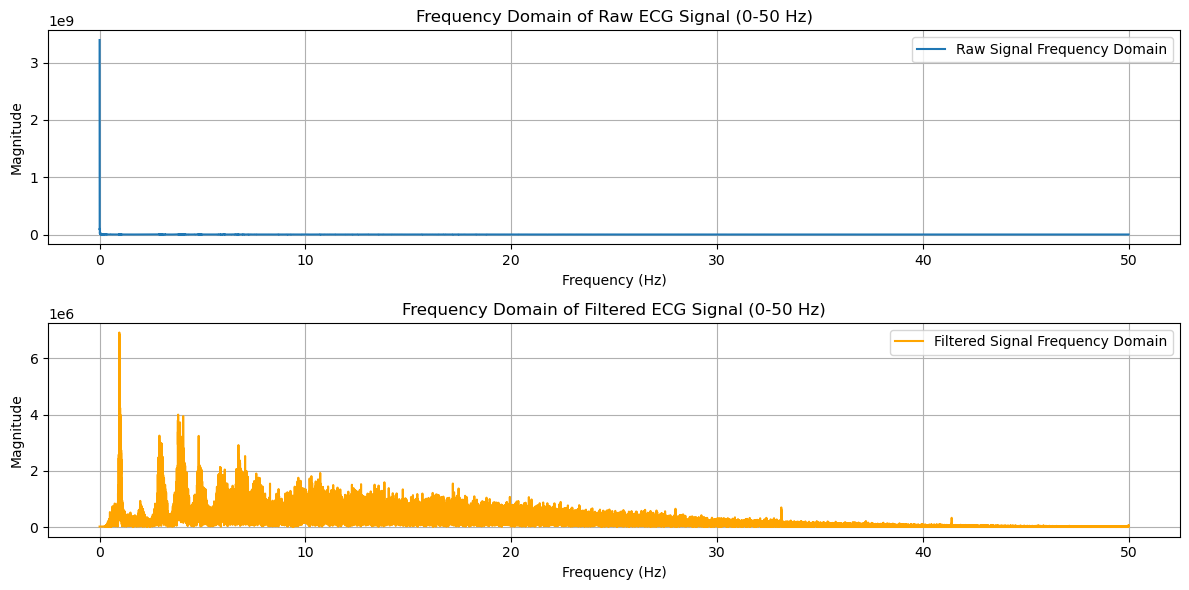

In [17]:
#code

# DFT of raw and filtered signals using FFT
dft_raw = rfft(ECG_sig)
dft_filtered = rfft(filtered_ecg)

# Corresponding frequency axis
frequencies = rfftfreq(len(ECG_sig), 1/fs)

# Magnitude of raw and filtered signals
magnitude_raw = np.abs(dft_raw)
magnitude_filtered = np.abs(dft_filtered)

# Creating a mask to select frequencies between 0 and 50 Hz
filter_mask = frequencies <= 50

# Ploting the magnitude vs frequency
plt.figure(figsize=(12, 6))

# Raw signal 
plt.subplot(2, 1, 1)
plt.plot(frequencies[filter_mask], magnitude_raw[filter_mask], label='Raw Signal Frequency Domain')
plt.title('Frequency Domain of Raw ECG Signal (0-50 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend(loc = "upper right")

# Filtered signal
plt.subplot(2, 1, 2)
plt.plot(frequencies[filter_mask], magnitude_filtered[filter_mask], label='Filtered Signal Frequency Domain', color='orange')
plt.title('Frequency Domain of Filtered ECG Signal (0-50 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend(loc = "upper right")

plt.tight_layout()
plt.show()


## Observations:

- The filter effectively removes low-frequency noise (baseline wander) and high-frequency noise, as shown by the lower peaks in the filtered signal.

- Essential ECG components in the 0-10 Hz range are preserved, crucial for accurate signal interpretation.

- The filtered signal’s overall magnitude is reduced, reflecting noise removal in both low and high frequencies.

- The filtered signal shows a smooth frequency response, indicating targeted noise reduction without disrupting key frequencies.


# QRS Detection 
*  QRS detection using “hamilton” method provided by the “biosppy” package.
*  If you do not have this package installed, use the following command to install it  !pip install biosppy in the next cell
* For google colab use following command in the cell as well: !pip install biosppy


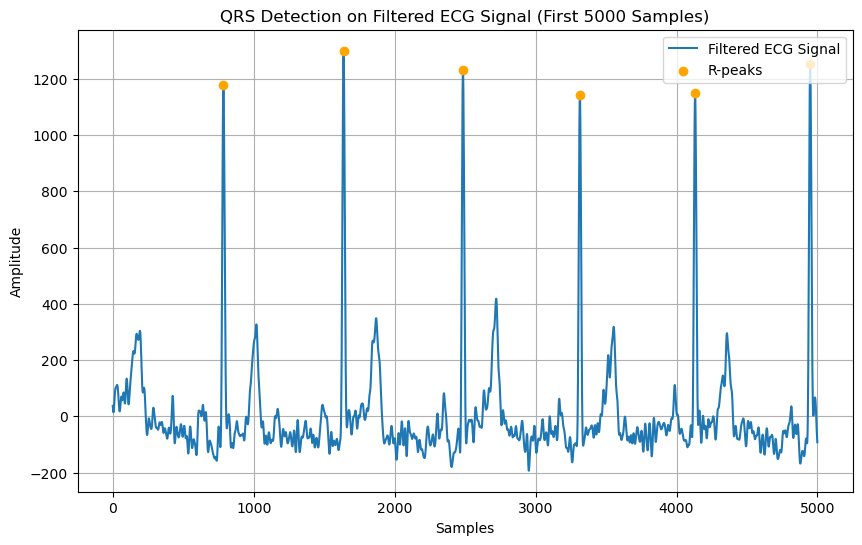

In [20]:
#still need to locally install biosppy
#code

# Import to use biosppy 
from biosppy.signals import ecg 

# Running QRS detection using the hamilton method
out = ecg.ecg(signal=filtered_ecg, sampling_rate=fs, show=False)

# Detected R-peaks locations
r_peaks = out['rpeaks']

# Ploting first 5000 samples of original signal with R-peaks highlighted 
plt.figure(figsize=(10, 6))

# ECG signal plot
plt.plot(filtered_ecg[:5000], label='Filtered ECG Signal')

# Highlighting R-peaks on signal
plt.scatter(r_peaks[r_peaks < 5000], filtered_ecg[r_peaks[r_peaks < 5000]], color='orange', label='R-peaks', zorder=5)

plt.title('QRS Detection on Filtered ECG Signal (First 5000 Samples)')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend(loc = "upper right")
plt.show()


## Observations:

- The orange dots mark the R-peaks on the ECG signal, which represent the heartbeats. These peaks are detected at the highest points of the QRS complexes, showing successful identification. 

- The spacing between consecutive R-peaks provides an indication of the heart rate. Here, the R-peaks appear at relatively regular intervals, suggesting a consistent rhythm in the sampled segment. Variations in R-peak intervals could indicate arrhythmias or irregular heartbeats.

- The signal amplitude ranges roughly between -200 and 1200. The peaks reach around 1200 in amplitude, which is expected in the QRS complex of an ECG signal, representing the rapid depolarization of the heart's ventricles.
